# TP2: Linear regression and logistic regression

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Define important functions : 

In [2]:
# hypothesis : 
def hs(w, xi):
    return np.dot(w, xi)

In [94]:
# Quadratic loss function :
def Ls(w, X, y):
    return (1/len(X))*np.array([(hs(w, xi) - y[i])**2 for i, xi in enumerate(X)]).sum()

In [49]:
# Gradient of Loss function :
def gradLs(w, X, y):
    return (1/len(X)**2)*np.array([xi*(hs(w, xi) - y[i]) for i, xi in enumerate(X)]).sum(axis=0)

In [164]:
#implimenation sigmoit function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [181]:
def Ls_log_reg(w, X, y):
  return (1/len(X))*np.sum([-np.log(sigmoid(y[i]*hs(w,xi))) for i, xi in enumerate(X)])

In [193]:
def gradLs_log_reg(w, X, y):
  return (1/len(X)) * np.array([-sigmoid(-y[i]*hs(w,xi))*y[i]*xi for i, xi in enumerate(X)]).sum(axis=0)

In [186]:
def _prepare_data(X, y, nor = False,bn=False):
    Xp = np.copy(X)
    if Xp.ndim == 1:
        Xp = Xp.reshape((-1, 1)) 
    if nor:
        Xp = ((Xp - Xp.mean(axis=0))/Xp.std(axis=0))
    Xp = np.hstack((np.ones((len(Xp), 1)), Xp))
    if bn:
        yp = np.where(y==0, -1, 1)
    else:
        yp = np.copy(y)
    return Xp, yp

In [187]:
# this function plot data using scatters and line that fit this data :
def plot_data_and_line(X, y, w=None):
    fig, ax = plt.subplots()
    
    min_x0 = np.amin(X)
    max_x1 = np.amax(X)
    
    ax.scatter(X, y, marker="o")

    if w is not None:
        x = np.linspace(min_x0, max_x1, 100)
        y = w[1] * x + w[0]
        ax.plot(x, y)

In [202]:
def score_lg_reg(w, X, y):
    y_pred = np.where(sigmoid(hs(X, w)) > 0.5, 1,-1)
    return (1/len(X)) * np.array(list(map(lambda x, y : 0 if x==y else 1, y_pred, y))).sum()

## Exercise 1: Unidimensional Linear Regression


#### 1. load data set

In [143]:
df = pd.read_csv("./datasets/mycar.csv")

In [144]:
df.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [145]:
data = df.to_numpy()

In [146]:
X_train, y_train = data[:, 0], data[:, 1]

In [147]:
X_train[:4]

array([4, 4, 7, 7], dtype=int64)

In [148]:
y_train[:4]

array([ 2, 10,  4, 22], dtype=int64)

#### 2. plot dataset :

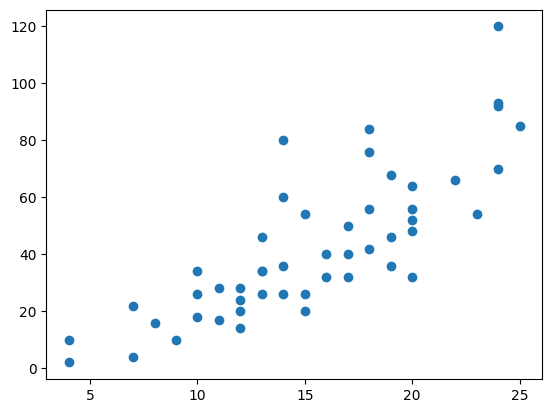

In [149]:
plot_data_and_line(X_train, y_train)

### Linear Regression Model :

#### Linear regression with algebraic method :

In [150]:
def LinearRegression(X, y):
    Xp, yp = _prepare_data(X,y)
    
    H = np.dot(Xp.T, Xp)
    
    H_inv = np.linalg.inv(H)

    w = np.dot(np.dot(H_inv, Xp.T), y)

    return w, Ls(w, Xp, yp)

##### Train our model with cars Data : 

In [151]:
w, loss = LinearRegression(X_train, y_train)
print(" Optimal parameters w : ", w)
print(" Loss : ", loss)

 Optimal parameters w :  [-17.57909489   3.93240876]
 Loss :  227.07042102189783


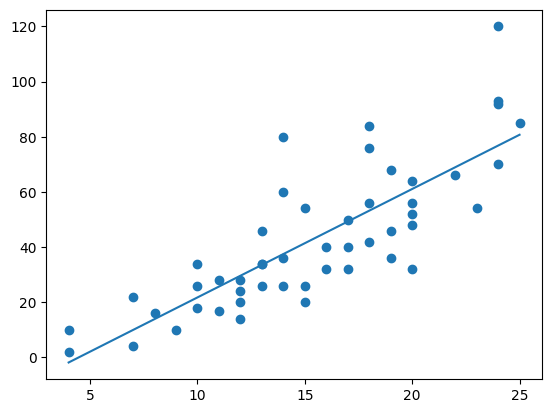

In [152]:
plot_data_and_line(X_train, y_train, w)

#### Linear regression with gredient descent method :

In [52]:
def LinearRegressionGD(w0, X, y, Tmax=1000, lr=0.01):
    Xp, yp = _prepare_data(X,y)
    
    w = np.copy(w0)
    loss = Ls(w, Xp, yp)
    gd = gradLs(w, Xp, yp)
    t=0
    
    while Tmax > t:
        w -= lr * gd
        loss = Ls(w, Xp, yp)
        gd = gradLs(w, Xp, yp)
        t+=1

    return w, loss, gd

In [53]:
w0 = np.random.random((2,))

In [58]:
w_gd, loss_gd, gd_gd = LinearRegressionGD(w0,X_train, y_train, Tmax=1e5, lr=0.01)
print(" Optimal parameters w : ", w_gd)
print(" Loss : ", loss_gd)
print(" grad : ", gd_gd)

 Optimal parameters w :  [-15.29122046   3.79917993]
 Loss :  227.61253589515346
 grad :  [ 0.00472301 -0.00027503]


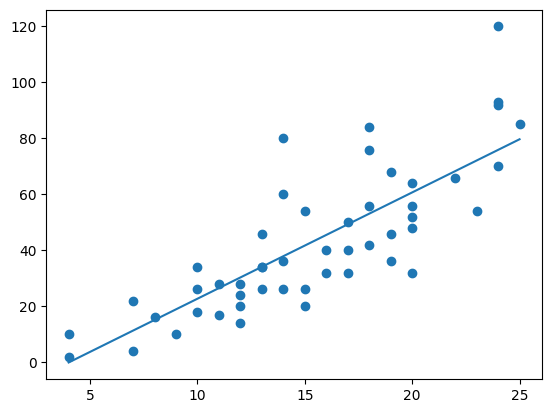

In [96]:
plot_data_and_line(X_train, y_train, w_gd)

## Exercise 2: Logistic Regression 

 #### 1. load data

In [153]:
binary = pop = pd.read_csv("./datasets/binary.csv").to_numpy()

#### Logistic regression with gredient descent:

In [215]:
def LogisticRegression(w0, X, y, lr=0.01, Tmax=3000, eps=1e-2):

  w = np.copy(w0)
  t = 0
  gd = gradLs_log_reg(w, X, y)
  while Tmax > t and np.linalg.norm(gd) > eps:
    gd = gd = gradLs_log_reg(w, X, y)
    w -= lr *gd
    t += 1

  return w, Ls_log_reg(w, X, y)

#### 2. Without Rank feature:

In [216]:
X_train, y_train = _prepare_data(binary[:, 1:-1], binary[:, 0], nor=True, bn=True)

In [217]:
w_lg, loss_log = LogisticRegression(np.random.random((3,)), X_train, y_train, Tmax=4000, eps=1e-3)

In [218]:
w_lg, loss_log

(array([-0.8056872 ,  0.31232464,  0.28246631]), 0.600433156250922)

In [219]:
score_lg_reg(wl, X_train, y_train)

0.32

#### 3. with Rank feature:

In [222]:
X_train, y_train = _prepare_data(binary[:, 1:], binary[:, 0], nor=True, bn=True)

In [229]:
w_lg, loss_log = LogisticRegression(np.random.random((4,)), X_train, y_train, Tmax=4000, eps=1e-3)

In [232]:
w_lg, loss_log

(array([-0.85562951,  0.26793451,  0.29102532, -0.5239613 ]),
 0.5743060321046379)

In [234]:
score_lg_reg(w_lg, X_train, y_train)

0.295

## Exercise 3: Multidimensional Linear Regression

#### 1. load data

In [101]:
pop = pd.read_csv("./datasets/pop.csv").to_numpy()

#### 2. split data

In [104]:
X_ptrain, y_ptrain = pop[:,:4], pop[:,4]

#### Train linear regression model :

In [106]:
w_p, loss_p = LinearRegression(X_ptrain, y_ptrain)
print(" Optimal parameters w : ", w_p)
print(" Loss : ", loss_p)

 Optimal parameters w :  [ 1.25881018e+02 -7.65709482e+00 -1.44987066e-01  3.50935890e-02
  5.52669494e+00]
 Loss :  1879.017335841115
